<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Train-Test Split and Cross-Validation Lab

_Authors: Joseph Nelson (DC), Kiefer Katovich (SF)_

---

## Review of Train/Test Validation Methods

We've discussed overfitting, underfitting, and how to validate the "generalizeability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed **multiple times** on different train/test splits of the data.

Ultimately we can use the training/test validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.


## Instructions

For your independent practice, fit **three different models** on the Boston Housing Data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

**Start with train/test split validation:**
* Fix a testing/training split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the testing data.
* Rank the models by how well they score on the testing data set.

**Then try k-fold cross-validation:**
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?
* Try a few different k-splits of the data for the same models.

If you're interested, try a variety of response variables. We start with **MEDV** (the `.target` attribute from the data set load method).

In [364]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')


In [365]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

c:\Users\redoc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

### 1) Clean up any data problems.

Fix any problems with the data, if applicable.

In [366]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [367]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [368]:
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

### 2) Select 3–4 variables with your data set on which to perform a 50-50 train/test split.

- Use scikit-learn.
- Score and plot your predictions.

Create our feature matrix (X) and target vector (y)


In [369]:
features = ['CRIM', 'RM', 'B', 'LSTAT']
X = X[features]
y = y

Train/Test Split and Model Validation


In [370]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.5, random_state=8)

Linear Regression model


In [371]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Model Evaluation

In [372]:
# Train score
lr.score(X_train, y_train)

0.6373031251572403

In [373]:
# Test score
lr.score(X_test, y_test)

0.6636463203503156

c:\Users\redoc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


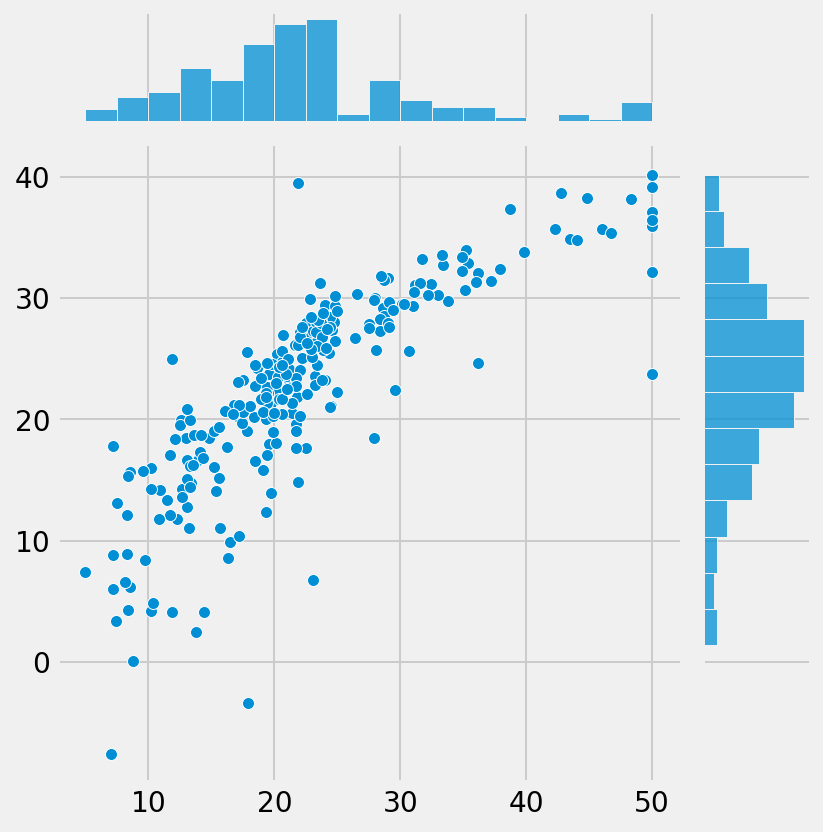

In [374]:
yhat = lr.predict(X_test)
sns.jointplot(y_test, yhat)

### 3) Try 70-30 and 90-10.

- Score and plot.  
- How do your metrics change?

70-30

In [375]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=8)

In [376]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [377]:
# Train score
lr.score(X_train, y_train)

0.666915164469765

In [378]:
# Test score
lr.score(X_test, y_test)

0.6162784690754456

c:\Users\redoc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


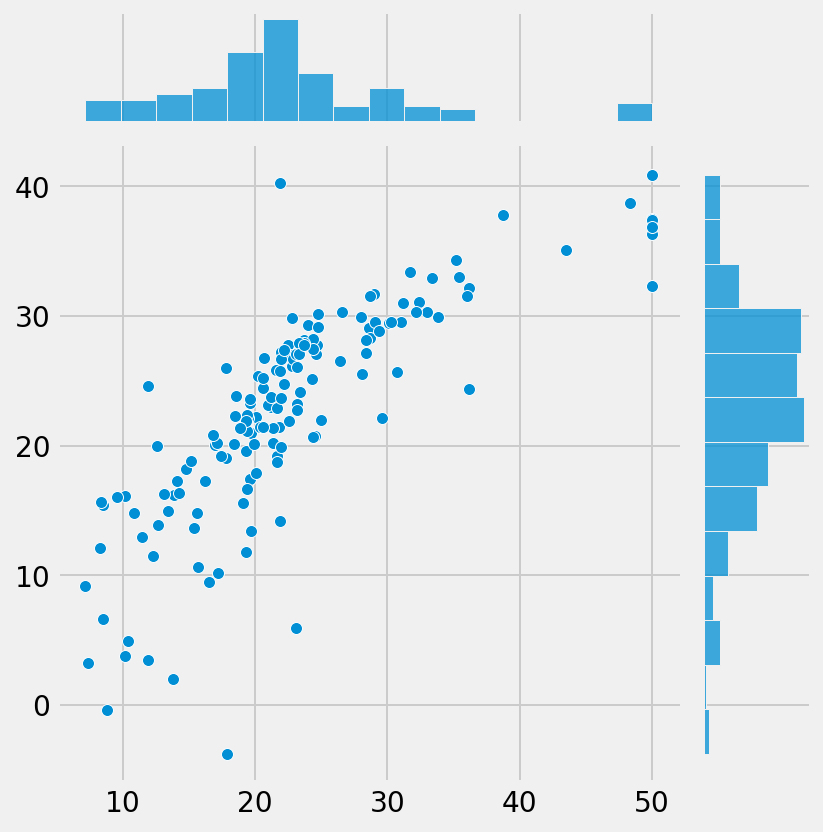

In [379]:
yhat = lr.predict(X_test)
sns.jointplot(y_test, yhat)

90-10

In [380]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state=8)

In [381]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [382]:
# Train score
lr.score(X_train, y_train)

0.6625354351654724

In [383]:
# Test score
lr.score(X_test, y_test)

0.583736955647274

c:\Users\redoc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


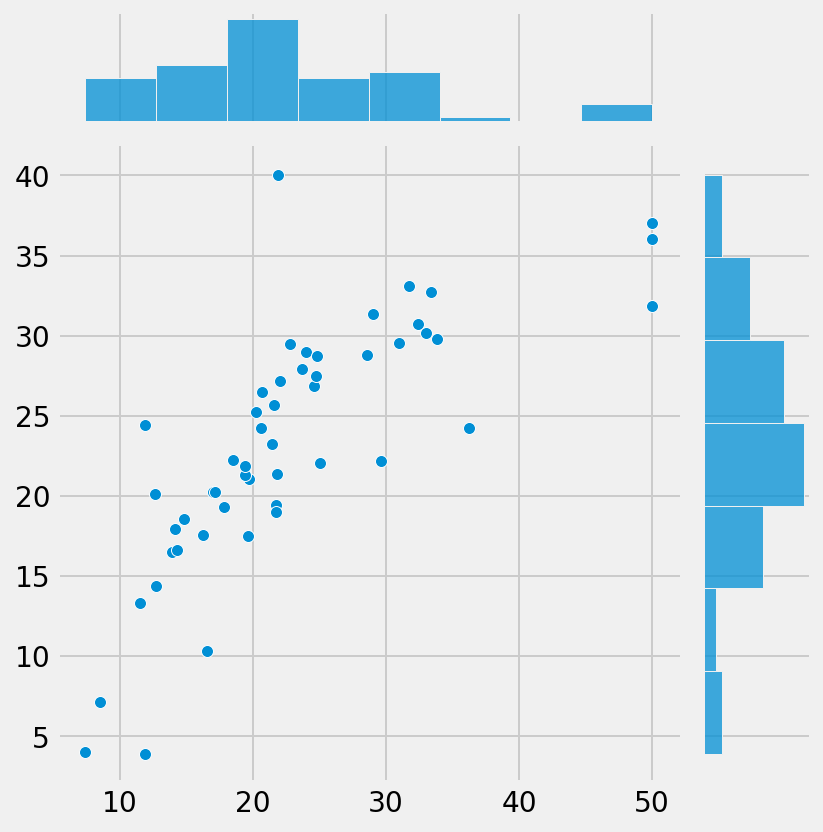

In [384]:
yhat = lr.predict(X_test)
sns.jointplot(y_test, yhat)

### 4) Try k-folds cross-validation with k between 5–10 for your regression. 

- What seems optimal? 
- How do your scores change?  
- What is the variance of scores like?
- Try out different folds to get a sense of how this impacts your score.

In [385]:
from sklearn.model_selection import train_test_split, cross_val_score

In [386]:
print(cross_val_score(lr, X, y, cv=5))
print(np.mean(cross_val_score(lr, X, y, cv=5)))
print(np.std(cross_val_score(lr, X, y, cv=5)))

[ 0.64643662  0.70494178  0.44154394  0.08682092 -0.49941486]
0.27606567946777777
0.44399911010238735


In [387]:
print(cross_val_score(lr, X, y, cv=6))
print(np.mean(cross_val_score(lr, X, y, cv=6)))
print(np.std(cross_val_score(lr, X, y, cv=6)))

[ 0.60629456  0.70763272  0.52029859  0.61899961 -0.33584065 -0.21629338]
0.31684857607055966
0.4241505172479729


In [388]:
print(cross_val_score(lr, X, y, cv=7))
print(np.mean(cross_val_score(lr, X, y, cv=7)))
print(np.std(cross_val_score(lr, X, y, cv=7)))

[ 0.65523009  0.59556838  0.5358105   0.49507761  0.24551663 -0.69093403
  0.11913605]
0.2793436035323284
0.4345530731154003


In [389]:
print(cross_val_score(lr, X, y, cv=8))
print(np.mean(cross_val_score(lr, X, y, cv=8)))
print(np.std(cross_val_score(lr, X, y, cv=8)))

[ 0.67248867  0.61782209  0.68506083  0.61035927  0.58782058 -0.28495311
 -1.03064528  0.03693312]
0.23686076994423522
0.5828049393173567


In [390]:
print(cross_val_score(lr, X, y, cv=9))
print(np.mean(cross_val_score(lr, X, y, cv=9)))
print(np.std(cross_val_score(lr, X, y, cv=9)))

[ 0.69102409  0.60248887  0.68904755  0.45791113  0.56625835  0.60162648
 -0.05893951 -0.84085892  0.08107676]
0.30995942143969524
0.4784229471305278


In [391]:
print(cross_val_score(lr, X, y, cv=10))
print(np.mean(cross_val_score(lr, X, y, cv=10)))
print(np.std(cross_val_score(lr, X, y, cv=10)))

[ 0.67432011  0.61881469 -0.92259386  0.49753279  0.64148858  0.50153546
 -0.22040921 -0.10012974 -1.52091558  0.23172261]
0.04013658517704344
0.7077272967851311


### 5) [Bonus] Optimize the $R^2$ score.

Can you optimize your $R^2$ by selecting the best features and validating the model using either train/test split or k-folds?

Your code will need to iterate through the different combinations of predictors, cross-validate the current model parameterization, and determine which set of features performed best.

The number of k-folds is up to you.

> *Hint:* The `itertools` package is useful for combinations and permutations.

In [392]:
from itertools import combinations

In [393]:
X=pd.DataFrame(boston.data, columns=boston.feature_names)
X.columns


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [394]:
list(combinations(X,2))

[('CRIM', 'ZN'),
 ('CRIM', 'INDUS'),
 ('CRIM', 'CHAS'),
 ('CRIM', 'NOX'),
 ('CRIM', 'RM'),
 ('CRIM', 'AGE'),
 ('CRIM', 'DIS'),
 ('CRIM', 'RAD'),
 ('CRIM', 'TAX'),
 ('CRIM', 'PTRATIO'),
 ('CRIM', 'B'),
 ('CRIM', 'LSTAT'),
 ('ZN', 'INDUS'),
 ('ZN', 'CHAS'),
 ('ZN', 'NOX'),
 ('ZN', 'RM'),
 ('ZN', 'AGE'),
 ('ZN', 'DIS'),
 ('ZN', 'RAD'),
 ('ZN', 'TAX'),
 ('ZN', 'PTRATIO'),
 ('ZN', 'B'),
 ('ZN', 'LSTAT'),
 ('INDUS', 'CHAS'),
 ('INDUS', 'NOX'),
 ('INDUS', 'RM'),
 ('INDUS', 'AGE'),
 ('INDUS', 'DIS'),
 ('INDUS', 'RAD'),
 ('INDUS', 'TAX'),
 ('INDUS', 'PTRATIO'),
 ('INDUS', 'B'),
 ('INDUS', 'LSTAT'),
 ('CHAS', 'NOX'),
 ('CHAS', 'RM'),
 ('CHAS', 'AGE'),
 ('CHAS', 'DIS'),
 ('CHAS', 'RAD'),
 ('CHAS', 'TAX'),
 ('CHAS', 'PTRATIO'),
 ('CHAS', 'B'),
 ('CHAS', 'LSTAT'),
 ('NOX', 'RM'),
 ('NOX', 'AGE'),
 ('NOX', 'DIS'),
 ('NOX', 'RAD'),
 ('NOX', 'TAX'),
 ('NOX', 'PTRATIO'),
 ('NOX', 'B'),
 ('NOX', 'LSTAT'),
 ('RM', 'AGE'),
 ('RM', 'DIS'),
 ('RM', 'RAD'),
 ('RM', 'TAX'),
 ('RM', 'PTRATIO'),
 ('RM', 'B'),
 

In [399]:
combi = []

for i in range(1,len(X.columns)+1):
    combi += list(combinations(X,i))

In [400]:
combi

[('CRIM',),
 ('ZN',),
 ('INDUS',),
 ('CHAS',),
 ('NOX',),
 ('RM',),
 ('AGE',),
 ('DIS',),
 ('RAD',),
 ('TAX',),
 ('PTRATIO',),
 ('B',),
 ('LSTAT',),
 ('CRIM', 'ZN'),
 ('CRIM', 'INDUS'),
 ('CRIM', 'CHAS'),
 ('CRIM', 'NOX'),
 ('CRIM', 'RM'),
 ('CRIM', 'AGE'),
 ('CRIM', 'DIS'),
 ('CRIM', 'RAD'),
 ('CRIM', 'TAX'),
 ('CRIM', 'PTRATIO'),
 ('CRIM', 'B'),
 ('CRIM', 'LSTAT'),
 ('ZN', 'INDUS'),
 ('ZN', 'CHAS'),
 ('ZN', 'NOX'),
 ('ZN', 'RM'),
 ('ZN', 'AGE'),
 ('ZN', 'DIS'),
 ('ZN', 'RAD'),
 ('ZN', 'TAX'),
 ('ZN', 'PTRATIO'),
 ('ZN', 'B'),
 ('ZN', 'LSTAT'),
 ('INDUS', 'CHAS'),
 ('INDUS', 'NOX'),
 ('INDUS', 'RM'),
 ('INDUS', 'AGE'),
 ('INDUS', 'DIS'),
 ('INDUS', 'RAD'),
 ('INDUS', 'TAX'),
 ('INDUS', 'PTRATIO'),
 ('INDUS', 'B'),
 ('INDUS', 'LSTAT'),
 ('CHAS', 'NOX'),
 ('CHAS', 'RM'),
 ('CHAS', 'AGE'),
 ('CHAS', 'DIS'),
 ('CHAS', 'RAD'),
 ('CHAS', 'TAX'),
 ('CHAS', 'PTRATIO'),
 ('CHAS', 'B'),
 ('CHAS', 'LSTAT'),
 ('NOX', 'RM'),
 ('NOX', 'AGE'),
 ('NOX', 'DIS'),
 ('NOX', 'RAD'),
 ('NOX', 'TAX'),
 ('NO

In [402]:
print(list(enumerate(combi)))

[(0, ('CRIM',)), (1, ('ZN',)), (2, ('INDUS',)), (3, ('CHAS',)), (4, ('NOX',)), (5, ('RM',)), (6, ('AGE',)), (7, ('DIS',)), (8, ('RAD',)), (9, ('TAX',)), (10, ('PTRATIO',)), (11, ('B',)), (12, ('LSTAT',)), (13, ('CRIM', 'ZN')), (14, ('CRIM', 'INDUS')), (15, ('CRIM', 'CHAS')), (16, ('CRIM', 'NOX')), (17, ('CRIM', 'RM')), (18, ('CRIM', 'AGE')), (19, ('CRIM', 'DIS')), (20, ('CRIM', 'RAD')), (21, ('CRIM', 'TAX')), (22, ('CRIM', 'PTRATIO')), (23, ('CRIM', 'B')), (24, ('CRIM', 'LSTAT')), (25, ('ZN', 'INDUS')), (26, ('ZN', 'CHAS')), (27, ('ZN', 'NOX')), (28, ('ZN', 'RM')), (29, ('ZN', 'AGE')), (30, ('ZN', 'DIS')), (31, ('ZN', 'RAD')), (32, ('ZN', 'TAX')), (33, ('ZN', 'PTRATIO')), (34, ('ZN', 'B')), (35, ('ZN', 'LSTAT')), (36, ('INDUS', 'CHAS')), (37, ('INDUS', 'NOX')), (38, ('INDUS', 'RM')), (39, ('INDUS', 'AGE')), (40, ('INDUS', 'DIS')), (41, ('INDUS', 'RAD')), (42, ('INDUS', 'TAX')), (43, ('INDUS', 'PTRATIO')), (44, ('INDUS', 'B')), (45, ('INDUS', 'LSTAT')), (46, ('CHAS', 'NOX')), (47, ('CHA

In [405]:
print(type(list(enumerate(combi))[0][1]))

<class 'tuple'>


In [406]:
r2_ = {}

linreg = LinearRegression()

for i,c in enumerate(combi):
    col_header = list(c)
    r2_[c] = np.mean(cross_val_score(linreg,X[col_header],y)) 


In [407]:
r2_

{('CRIM',): -0.31953853846454455,
 ('ZN',): -0.43857641277847714,
 ('INDUS',): -0.21937040374683706,
 ('CHAS',): -0.6499100338832287,
 ('NOX',): -0.3078274716614863,
 ('RM',): -0.02952191995781055,
 ('AGE',): -0.3755524742970227,
 ('DIS',): -0.5969831950139457,
 ('RAD',): -0.2882220984447679,
 ('TAX',): -0.16778396775534377,
 ('PTRATIO',): -0.1595965159544064,
 ('B',): -0.3110426144111379,
 ('LSTAT',): 0.2971098460066866,
 ('CRIM', 'ZN'): -0.1548313329578324,
 ('CRIM', 'INDUS'): -0.11185465668344836,
 ('CRIM', 'CHAS'): -0.2702335345123015,
 ('CRIM', 'NOX'): -0.17155742336613203,
 ('CRIM', 'RM'): 0.12516572661270747,
 ('CRIM', 'AGE'): -0.17700345049726857,
 ('CRIM', 'DIS'): -0.33456780677937054,
 ('CRIM', 'RAD'): -0.279213821771922,
 ('CRIM', 'TAX'): -0.13982513952382014,
 ('CRIM', 'PTRATIO'): 0.010586164147345634,
 ('CRIM', 'B'): -0.2621868288511557,
 ('CRIM', 'LSTAT'): 0.29827795892821385,
 ('ZN', 'INDUS'): -0.1851744181054717,
 ('ZN', 'CHAS'): -0.3656917780486631,
 ('ZN', 'NOX'): -0.

In [408]:
{k: v for k, v in sorted(r2_.items(), key=lambda item: item[1], reverse=True)}


{('CRIM',
  'ZN',
  'CHAS',
  'NOX',
  'AGE',
  'DIS',
  'RAD',
  'TAX',
  'PTRATIO',
  'B',
  'LSTAT'): 0.505275161635448,
 ('CRIM',
  'ZN',
  'NOX',
  'AGE',
  'DIS',
  'RAD',
  'TAX',
  'PTRATIO',
  'B',
  'LSTAT'): 0.5046498339504799,
 ('CRIM',
  'ZN',
  'CHAS',
  'NOX',
  'DIS',
  'RAD',
  'TAX',
  'PTRATIO',
  'B',
  'LSTAT'): 0.5042051050366264,
 ('CRIM',
  'ZN',
  'NOX',
  'DIS',
  'RAD',
  'TAX',
  'PTRATIO',
  'B',
  'LSTAT'): 0.5029314837238001,
 ('CRIM',
  'ZN',
  'INDUS',
  'NOX',
  'AGE',
  'DIS',
  'RAD',
  'TAX',
  'PTRATIO',
  'B',
  'LSTAT'): 0.4948565952408933,
 ('CRIM',
  'ZN',
  'INDUS',
  'CHAS',
  'NOX',
  'AGE',
  'DIS',
  'RAD',
  'TAX',
  'PTRATIO',
  'B',
  'LSTAT'): 0.49353176521789666,
 ('ZN',
  'CHAS',
  'NOX',
  'DIS',
  'RAD',
  'TAX',
  'PTRATIO',
  'B',
  'LSTAT'): 0.4923476007920911,
 ('CRIM',
  'ZN',
  'INDUS',
  'NOX',
  'DIS',
  'RAD',
  'TAX',
  'PTRATIO',
  'B',
  'LSTAT'): 0.491936369961687,
 ('ZN',
  'NOX',
  'DIS',
  'RAD',
  'TAX',
  'PTRATIO

The highest R2 score is for ('CRIM',
  'ZN',
  'CHAS',
  'NOX',
  'AGE',
  'DIS',
  'RAD',
  'TAX',
  'PTRATIO',
  'B',
  'LSTAT'): 0.505275161635448,

### 5.1) Explain what could be wrong with this approach.

In [396]:
# A:

### 6) [Bonus] Explore another target variable and practice Patsy formulas.

Can you find another response variable, given a combination of predictors, that can be predicted accurately through the exploration of different predictors in this data set?

**Try using Patsy to construct your target and predictor matrices from formula strings.**

> *Tip: Check out pairplots, coefficients, and Pearson scores.*

In [397]:
import patsy

# A: